## 1. Multicollinearity

Multicollinearity occurs when in a matrix $X_{nxk}$ where $n >= k$ and one or  of the k columns of the matrix can be expressed as a linear combination of the oth
er columns. Then, that matrix X is incomplete rank of columns because the rank is less than k.

In that sense there is redundancy in the variables.

$
y_i = \beta_1 +\beta_2 x_{1,i} +\beta_3 x_{2-i} + \beta_1 x_{3,i}      </pre>      ; i=1,2,3,4,5
$

The matrix x is (nx3) 
$$\begin{bmatrix} x_{1,1} & x_{2,1} & x_{3,1} \\ x_{1,2} & x_{2,2} & x_{3,2} \\ x_{1,3} & x_{2,3} & x_{3,3} \\ x_{1,4} & x_{2,4} & x_{3,4} \\ x_{1,5} & x_{2,5} & x_{3,5}\end{bmatrix}$$

We know that potential education
Edad - Educación - 6




$
x_{3,1} =  x_{1,1} + x_{2,1} -6
$


$
x_{3,2} = x_{1,2} + x_{2,2} -6
$

$
... ...
$

$
x_{1,5} = x_{2,5} +x_{3,5} -6
$
Therefore, in this regression there is a multicollinearity problem, since the variables are perfectly correlated (for example x_{3,i} with the others)

Create Matrix X

In [1]:
import numpy as np
from numpy import random as rd
from numpy.linalg import det, inv
import pandas as pd
import pandas as pd
import pyreadr

In [2]:
np.random.seed(12345676)
n = 10   ####

#Create a matrix 10x10 

A = np.zeros((10,10))

In [3]:
##### 9 vectors (columns) follow a normal distribution.

for i in range(A.shape[0] -1): #####shape[0] gives number of rows and -1 eliminates 1 row
 A[:, i] = np.random.normal(0, 1, 10)   

In [4]:
#####The 10th vector is a linear combination of tree vectors.
A[:, 9] = A[:, 1] + A[:, 2]+ A[:, 3]

In [5]:
#####Try to find the inverse of this matrix and show what is the output you get in both R and Python.
A_inversa = np.linalg.inv(A)
print(A_inversa)

[[-1.32053415e-01  1.76275928e-01 -2.37616999e-01  1.02436989e+00
  -1.33979831e-01 -1.19597287e+00 -3.26102761e-01  6.81508377e-01
  -9.21057208e-02 -3.11491632e+00]
 [-2.37192537e+15  7.75324009e+13  2.67964671e+15 -3.12586833e+15
  -2.50501911e+15  2.10985352e+15 -1.06200405e+15 -2.98183156e+15
  -7.68742327e+14  8.08039833e+15]
 [-2.37192537e+15  7.75324009e+13  2.67964671e+15 -3.12586833e+15
  -2.50501911e+15  2.10985352e+15 -1.06200405e+15 -2.98183156e+15
  -7.68742327e+14  8.08039833e+15]
 [-2.37192537e+15  7.75324009e+13  2.67964671e+15 -3.12586833e+15
  -2.50501911e+15  2.10985352e+15 -1.06200405e+15 -2.98183156e+15
  -7.68742327e+14  8.08039833e+15]
 [ 4.73287186e-02  3.22574270e-01  2.31682942e-01 -1.99000574e-01
  -2.29989792e-01  5.24331002e-01  7.02758149e-02 -9.41737371e-02
   1.12791690e-01  1.15297474e+00]
 [-4.61339012e-01  7.41915368e-02  2.61834594e-01 -8.83665952e-01
  -8.77158528e-01  6.68417441e-01 -3.45469535e-01 -8.71689254e-01
  -5.03934910e-01  1.81279989e+00

In [8]:
from IPython.display import Image
from IPython.core.display import HTML 
PATH = "/Users/acoap/Documents/imagenes/"


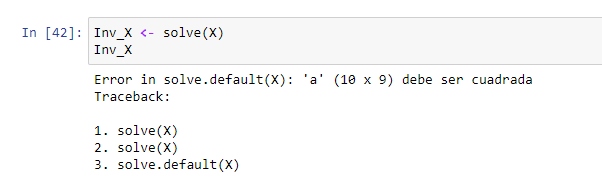

In [11]:
Image(filename = PATH + "matrix_r.png", width=10000, height=100)

# Explain why you get different results.

Since column 10 is a linear combination of three other columns of the matrix, we conclude that our matrix is singular. Also, we know that a singular matrix has no determinant, so we cannot obtain its inverse. This is why, even using different statistical packages in R, the matrix cannot be observed, compared to Python statistical packages, which can approximate an inverse matrix even though these matrices are singular.

## 2. Analyzing RCT data with Precision Adjustment

## Data

In this lab, we analyze the Pennsylvania re-employment bonus experiment, which was previously studied in "Sequential testing of duration data: the case of the Pennsylvania ‘reemployment bonus’ experiment" (Bilias, 2000), among others. These experiments were conducted in the 1980s by the U.S. Department of Labor to test the incentive effects of alternative compensation schemes for unemployment insurance (UI). In these experiments, UI claimants were randomly assigned either to a control group or one of five treatment groups. Actually, there are six treatment groups in the experiments. Here we focus on treatment group 4, but feel free to explore other treatment groups. In the control group the current rules of the UI applied. Individuals in the treatment groups were offered a cash bonus if they found a job within some pre-specified period of time (qualification period), provided that the job was retained for a specified duration. The treatments differed in the level of the bonus, the length of the qualification period, and whether the bonus was declining over time in the qualification period; see http://qed.econ.queensu.ca/jae/2000-v15.6/bilias/readme.b.txt for further details on data. 
  

In [6]:
!pip install pyreadr

In [7]:
import pandas as pd
import pyreadr
import matplotlib.pyplot as plt
import seaborn as sns


In [8]:
## loading the data
Penn = pd.read_csv("../../data/penn_jae.dat" , sep='\s', engine='python')
n = Penn.shape[0]
p_1 = Penn.shape[1]

##Focus on the Treatment group 2
Penn = Penn[ (Penn['tg'] == 2) | (Penn['tg'] == 0) ]

In [9]:
Penn.shape

(5782, 24)

In [10]:
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q5,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,0,1,0,NaN
1,10635,2,7,3,0,0,0,0,0,0,...,0,0,1,0,0,0,1,0,0,NaN
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,NaN
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,NaN


In [11]:
#this columns were not dropped out :  Unnamed: 13, recall
Penn.columns
Penn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5782 entries, 0 to 13911
Data columns (total 24 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   abdt         5782 non-null   int64  
 1   tg           5782 non-null   int64  
 2   inuidur1     5782 non-null   int64  
 3   inuidur2     5782 non-null   int64  
 4   female       5782 non-null   int64  
 5   black        5782 non-null   int64  
 6   hispanic     5782 non-null   int64  
 7   othrace      5782 non-null   int64  
 8   dep          5782 non-null   int64  
 9   q1           5782 non-null   int64  
 10  q2           5782 non-null   int64  
 11  q3           5782 non-null   int64  
 12  q4           5782 non-null   int64  
 13  Unnamed: 13  5782 non-null   int64  
 14  q5           5782 non-null   int64  
 15  q6           5782 non-null   int64  
 16  recall       5782 non-null   int64  
 17  agelt35      5782 non-null   int64  
 18  agegt54      5782 non-null   int64  
 19  durab

C:\Users\acoap\Estadistica\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of the variable inuidur1 (Treatment Group 2)')

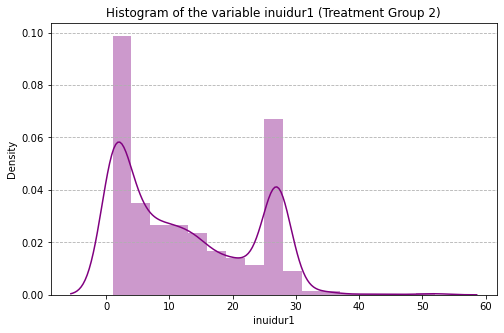

In [49]:
#Plotting the inuidur1 variable for the tg=2 group
fig, ax = plt.subplots(figsize=(8, 5))

sns.distplot(Penn[(Penn['tg'] == 2)].inuidur1, color='purple')
plt.grid(axis='y',linestyle='--')
plt.title('Histogram of the variable inuidur1 (Treatment Group 2)')


C:\Users\acoap\Estadistica\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


Text(0.5, 1.0, 'Histogram of the variable inuidur1 (Control Group)')

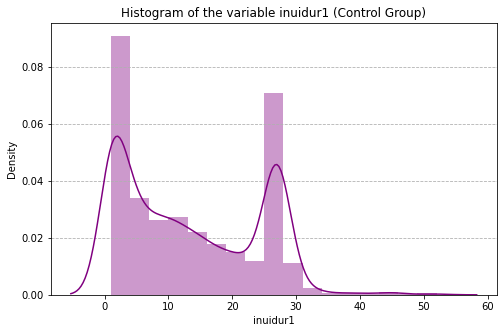

In [48]:
#Plotting the inuidur1 variable for the tg=0 group
fig, ax = plt.subplots(figsize=(8, 5))

sns.distplot(Penn[(Penn['tg'] == 0)].inuidur1, color='purple')
plt.grid(axis='y',linestyle='--')
plt.title('Histogram of the variable inuidur1 (Control Group)')

It can be seen that the distribution of the control group and the treatment group is similar.

In [14]:
# Dependent variable
Penn['T2'] = (Penn[['tg']]==2).astype(int)

# Create category variable
Penn['dep'] = Penn['dep'].astype( 'category' )
Penn.head()

,abdt,tg,inuidur1,inuidur2,female,black,hispanic,othrace,dep,q1,...,q6,recall,agelt35,agegt54,durable,nondurable,lusd,husd,muld,T2
0,10824,0,18,18,0,0,0,0,2,0,...,0,0,0,0,0,0,1,0,NaN,0
1,10635,2,7,3,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,NaN,1
3,10824,0,1,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
4,10747,0,27,27,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,NaN,0
9,10754,2,20,20,1,0,0,0,0,0,...,0,0,0,0,0,0,0,1,NaN,1


In [15]:
Penn['dep'].unique()

[2, 0, 1]
Categories (3, int64): [0, 1, 2]

### Model 
To evaluate the impact of the treatments on unemployment duration, we consider the linear regression model:

$$
Y =  D \beta_1 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W')' = 0,
$$

where $Y$ is  the  log of duration of unemployment, $D$ is a treatment  indicators,  and $W$ is a set of controls including age group dummies, gender, race, number of dependents, quarter of the experiment, location within the state, existence of recall expectations, and type of occupation.   Here $\beta_1$ is the ATE, if the RCT assumptions hold rigorously.


We also consider interactive regression model:

$$
Y =  D \alpha_1 + D W' \alpha_2 + W'\beta_2 + \varepsilon, \quad E \varepsilon (D,W', DW')' = 0,
$$
where $W$'s are demeaned (apart from the intercept), so that $\alpha_1$ is the ATE, if the RCT assumptions hold rigorously.

Under RCT, the projection coefficient $\beta_1$ has
the interpretation of the causal effect of the treatment on
the average outcome. We thus refer to $\beta_1$ as the average
treatment effect (ATE). Note that the covariates, here are
independent of the treatment $D$, so we can identify $\beta_1$ by
just linear regression of $Y$ on $D$, without adding covariates.
However we do add covariates in an effort to improve the
precision of our estimates of the average treatment effect.

- Run all specifications:
    * classical 2-sample approach, no adjustment (CL)
    * classical linear regression adjustment (CRA)
    * interactive regression adjustment (IRA)
    * interactive regression adjustment (IRA) using Lasso

# Carry out covariate balance check

This is done using "lm_robust" command which unlike "lm" in the base command automatically does the correct Eicher-Huber-White standard errors, instead othe classical non-robus formula based on the homoscdedasticity command.

In [16]:
pip install statsmodels --upgrade

In [17]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
import patsy
import numpy as np

In [18]:
## Regress  on all covariates

In [19]:
y = Penn[['T2']].reset_index( drop = True )

In [20]:
# Get data from R
result = pyreadr.read_r('../../data/m_reg_3.RData')
X_vars = result['X1']

In [21]:
model = "T2~(female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2"
model_results = smf.ols( model, data=Penn ).fit().get_robustcov_results(cov_type = "HC1")

print(model_results.summary())
print( "Number of regressors in the basic model:",len(model_results.params), '\n')

                            OLS Regression Results                            
Dep. Variable:                     T2   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.000
Method:                 Least Squares   F-statistic:                     4.748
Date:                Sat, 30 Apr 2022   Prob (F-statistic):           5.79e-51
Time:                        03:49:54   Log-Likelihood:                -4065.8
No. Observations:                5782   AIC:                             8352.
Df Residuals:                    5672   BIC:                             9084.
Df Model:                         109                                         
Covariance Type:                  HC1                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.5090    

C:\Users\acoap\Estadistica\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 119, but rank is 108
  warnings.warn('covariance of constraints does not have full '


We see that that even though this is a randomized experiment, balance conditions are failed.

# Model Specification using data from R

## 1. classical 2-sample approach, no adjustment (CL)

In [22]:
# model specifications
# take log of inuidur1
Penn["log_inuidur1"] = np.log( Penn["inuidur1"] ) 
log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )

# no adjustment (2-sample approach)
formula_cl = 'log_inuidur1 ~ T2'

# adding controls
# Omitted dummies: q1, nondurable, muld

ols_cl = smf.ols( formula = formula_cl, data = Penn ).fit().get_robustcov_results(cov_type = "HC1")




# Results 
print(ols_cl.summary())

                            OLS Regression Results                            
Dep. Variable:           log_inuidur1   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     5.879
Date:                Sat, 30 Apr 2022   Prob (F-statistic):             0.0154
Time:                        03:49:56   Log-Likelihood:                -9344.7
No. Observations:                5782   AIC:                         1.869e+04
Df Residuals:                    5780   BIC:                         1.871e+04
Df Model:                           1                                         
Covariance Type:                  HC1                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      2.0568      0.021     98.158      0.0

## 2. classical linear regression adjustment (CRA)

In [23]:
import statsmodels.regression.linear_model as sm
#getting data7
# Get data from R
result = pyreadr.read_r('../../data/ols_cra_reg_3.RData')
X_vars = result['X1']


log_inuidur1 = pd.DataFrame(np.log( Penn["inuidur1"] ) ).reset_index( drop = True )
formula_cra = 'log_inuidur1 ~ T2 + (female+black+othrace+C(dep)+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'


ols_cra = sm.OLS( log_inuidur1, X_vars ).fit().get_robustcov_results(cov_type = "HC1")
print(ols_cra.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.056
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     84.52
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:49:57   Log-Likelihood:                -9180.6
No. Observations:                5782   AIC:                         1.857e+04
Df Residuals:                    5678   BIC:                         1.926e+04
Df Model:                         103                                         
Covariance Type:                  HC1                                         
                           coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------
(Intercept)              2.4472 

C:\Users\acoap\Estadistica\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 103, but rank is 102
  warnings.warn('covariance of constraints does not have full '


## 3. Interactive regression adjustment (IRA)

In [24]:
# Reset index to estimation
# Get data from R

formula_ira = 'T2 ~ (female+black+othrace+dep+q2+q3+q4+q5+q6+agelt35+agegt54+durable+lusd+husd)**2'

result = pyreadr.read_r('../../data/ols_ira_reg_3.RData')
X_vars_ols_ira = result['S1']

ols_ira = sm.OLS(log_inuidur1, X_vars_ols_ira  ).fit().get_robustcov_results(cov_type = "HC1")

# Results 
print(ols_ira.summary())

                            OLS Regression Results                            
Dep. Variable:               inuidur1   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.039
Method:                 Least Squares   F-statistic:                     35.02
Date:                Sat, 30 Apr 2022   Prob (F-statistic):               0.00
Time:                        03:49:57   Log-Likelihood:                -9129.1
No. Observations:                5782   AIC:                         1.866e+04
Df Residuals:                    5579   BIC:                         2.002e+04
Df Model:                         202                                         
Covariance Type:                  HC1                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
(Intercept)     

C:\Users\acoap\Estadistica\lib\site-packages\statsmodels\base\model.py:1871: ValueWarning: covariance of constraints does not have full rank. The number of constraints is 202, but rank is 188
  warnings.warn('covariance of constraints does not have full '


## 4. Interactive regression adjustment (IRA) using Lasso.

In [25]:
import hdmpy 

In [26]:
import multiprocess

Next we try out partialling out with lasso

In [27]:
# Get data from R
result= pyreadr.read_r('../../data/rlasso_ira_reg_3.RData')
X_vars = result['S']

In [28]:
X_vars

,T2,Xfemale,Xblack,Xothrace,Xfactor(dep)1,Xfactor(dep)2,Xq2,Xq3,Xq4,Xq5,...,T2:Xagelt35:agegt54,T2:Xagelt35:durable,T2:Xagelt35:lusd,T2:Xagelt35:husd,T2:Xagegt54:durable,T2:Xagegt54:lusd,T2:Xagegt54:husd,T2:Xdurable:lusd,T2:Xdurable:husd,T2:Xlusd:husd
0,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,0.839329,-0.200104,-0.235559,-0.223279,0.736769,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
1,0.580076,-0.400726,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,0.764441,-0.223279,-0.263231,...,0.0,-0.042638,0.503228,-0.070729,-0.010935,-0.018861,-0.016052,-0.031903,-0.016855,0.0
2,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,-0.223279,0.736769,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
3,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
4,0.580076,0.599274,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,0.0,-0.042638,-0.076849,-0.070729,-0.010935,-0.018861,-0.016052,-0.031903,-0.016855,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5777,-0.419924,0.599274,-0.118817,0.994811,-0.116569,0.839329,-0.200104,-0.235559,-0.223279,0.736769,...,-0.0,0.030866,0.055632,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
5778,0.580076,-0.400726,0.881183,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,0.0,-0.042638,-0.076849,-0.070729,-0.010935,-0.018861,-0.016052,-0.031903,-0.016855,0.0
5779,-0.419924,-0.400726,-0.118817,-0.005189,-0.116569,0.839329,0.799896,-0.235559,-0.223279,-0.263231,...,-0.0,0.030866,-0.364292,0.051201,0.007916,0.013654,0.011620,0.023095,0.012201,-0.0
5780,0.580076,0.599274,-0.118817,-0.005189,-0.116569,-0.160671,-0.200104,-0.235559,0.776721,-0.263231,...,0.0,-0.042638,-0.076849,-0.070729,-0.010935,0.561215,-0.016052,-0.031903,-0.016855,0.0


In [29]:
result = hdmpy.rlassoEffects( X_vars, log_inuidur1, index = 0 )    


In [31]:
result.res['coefficients']

,0
T2,-0.074573


In [30]:
rlasso_ira = pd.DataFrame(np.array( (result.res['coefficients'][0] , result.res['se'][0] , \
           result.res['t'][0] , result.res['pval'][0] ) ).reshape(1, 4) , columns = ['Coef.' , \
                            "Std.Err." , "t" , 'P>|t|'] , index = ['T2'])
rlasso_ira

,Coef.,Std.Err.,t,P>|t|
T2,-0.074573,0.032104,-2.322845,0.020187


## Results

In [42]:
table1 = np.zeros((2, 4))
table1[0,0] = ols_cl.summary2().tables[1]['Coef.']['T2']
table1[0,1] = ols_cra.summary2().tables[1]['Coef.']['T2TRUE']
table1[0,2] = ols_ira.summary2().tables[1]['Coef.']['T2TRUE']
table1[0,3] = rlasso_ira['Coef.']['T2']

table1[1,0] = ols_cl.summary2().tables[1]['Std.Err.']['T2']
table1[1,1] = ols_cra.summary2().tables[1]['Std.Err.']['T2TRUE']
table1[1,2] = ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE']
table1[1,3] = rlasso_ira['Std.Err.']['T2']

table1 = pd.DataFrame(table2, columns = ["CL", "CRA", "IRA", "IRA Lasso"], \
                      index = ["estimate","standard error"])
table1

,CL,CRA,IRA,IRA Lasso
estimate,-0.078825,-0.071207,-0.069904,-0.074573
standard error,0.032509,0.032044,0.032076,0.032104


In [43]:
table1.to_latex
print(table1.to_latex())

\begin{tabular}{lrrrr}
\toprule
{} &        CL &       CRA &       IRA &  IRA Lasso \\
\midrule
estimate       & -0.078825 & -0.071207 & -0.069904 &  -0.074573 \\
standard error &  0.032509 &  0.032044 &  0.032076 &   0.032104 \\
\bottomrule
\end{tabular}



Treatment group 2 experiences an average decrease of about $7.8\%$ in the length of unemployment spell.


Observe that regression estimators delivers estimates that are slighly more efficient (lower standard errors) than the simple 2 mean estimator, but essentially all methods have very similar standard errors. From IRA results we also see that there is not any statistically detectable heterogeneity.  We also see the regression estimators offer slightly lower estimates -- these difference occur perhaps to due minor imbalance in the treatment allocation, which the regression estimators try to correct.

## Plotting

Using the 3. interactive regression adjustment (IRA) plot the coefficients of the next variables
- T2*female
- T2*black
- T2*agelt35
- T2*factor(dep)1
Please comment this figure and try to give an explanation for the coefficients.

In [40]:
import seaborn as sns
import matplotlib as mpl
import matplotlib.pyplot as plt

In [53]:
table3 = np.zeros((4, 2))

table3[0,0] = ols_ira.summary2().tables[1]['Coef.']['Xq2']
table3[1,0] = ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xblack']
table3[2,0] = ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xagelt35']
table3[3,0] = ols_ira.summary2().tables[1]['Coef.']['T2TRUE:Xfactor(dep)1']

table3[0,1] = ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE:Xfemale']
table3[1,1] = ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE:Xblack']
table3[2,1] = ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE:Xagelt35']
table3[3,1] = ols_ira.summary2().tables[1]['Std.Err.']['T2TRUE:Xfactor(dep)1']




table3 = pd.DataFrame(table3, columns = ["coef",'err'], \
                      index = ['T2TRUE:Xfemale','T2TRUE:Xblack','T2TRUE:Xagelt35','T2TRUE:Xfactor(dep)1'])




In [54]:
table3 =table3.reset_index()
table3

,index,coef,err
0,T2TRUE:Xfemale,-0.254644,0.549897
1,T2TRUE:Xblack,0.452557,0.510319
2,T2TRUE:Xagelt35,1.123320,0.637419
3,T2TRUE:Xfactor(dep)1,0.763602,0.785448


C:\Users\acoap\AppData\Local\Temp/ipykernel_3880/1060377157.py:7: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  ax.scatter(x=pd.np.arange(table3.shape[0]),


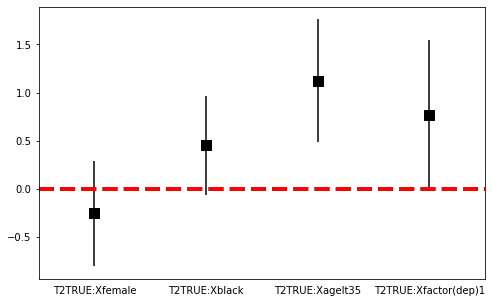

In [61]:
fig, ax = plt.subplots(figsize=(8, 5))
table3.plot(x='index', y='coef', kind='bar', 
             ax=ax, color='none', 
             yerr='err', legend=False)
ax.set_ylabel('')
ax.set_xlabel('')
ax.scatter(x=pd.np.arange(table3.shape[0]), 
           marker='s', s=120, 
           y=table3['coef'], color='black')
ax.axhline(y=0, linestyle='--', color='black', linewidth=4)
ax.xaxis.set_ticks_position('none')
_ = ax.set_xticklabels(['T2TRUE:Xfemale','T2TRUE:Xblack','T2TRUE:Xagelt35','T2TRUE:Xfactor(dep)1'], 
                       rotation=0, fontsize=10)

# Line to define zero on the y-axis
ax.axhline(y=0, linestyle='--', color='red', linewidth=4)
plt.show()

We can see in the graph that all 4 heteregonuos effects are not statiscally significant at 5% and that 0 belongs to the IC. However, T2*agelt35 is statiscally significant at 10%.

Therefore, we can conclude that there is not enough evidence that there was a special effect for the female individuals, the black individuals, the individuals with less than 35 years old, and the individuals with 1 dependents of the treated. 